In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [3]:
pip install pandas-datareader

In [4]:
import pandas_datareader.data as web

In [5]:

#from pandas.io.data import DataReader
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [8]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [9]:
for stock in tech_list:
    globals()[stock]=web.DataReader(stock,'yahoo',start,end)

In [10]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-21,146.130005,144.630005,145.529999,145.399994,74993500.0,144.574005
2021-07-22,148.199997,145.809998,145.940002,146.800003,77338200.0,145.966064
2021-07-23,148.720001,146.919998,147.550003,148.559998,71447400.0,147.716049
2021-07-26,149.830002,147.699997,148.270004,148.990005,72434100.0,148.143631
2021-07-27,149.210007,145.550003,149.119995,146.770004,104818600.0,145.936249
...,...,...,...,...,...,...
2022-07-18,151.570007,146.699997,150.740005,147.070007,81420900.0,147.070007
2022-07-19,151.229996,146.910004,147.919998,151.000000,82982400.0,151.000000
2022-07-20,153.720001,150.369995,151.119995,153.039993,64823400.0,153.039993


In [11]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,158.040512,154.305866,156.079213,156.261457,8.811932e+07,155.893853
std,12.705483,12.390202,12.623285,12.538795,2.695891e+07,12.523718
min,132.389999,129.039993,130.070007,130.059998,1.081211e+07,130.059998
25%,147.977501,145.269997,146.237499,146.587502,6.966875e+07,146.092697
50%,154.849998,150.815002,152.620003,152.805000,8.325120e+07,152.269127
75%,169.654995,165.384998,167.457497,166.524998,1.018725e+08,166.280693
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-07-21 to 2022-07-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


<AxesSubplot:xlabel='Date'>

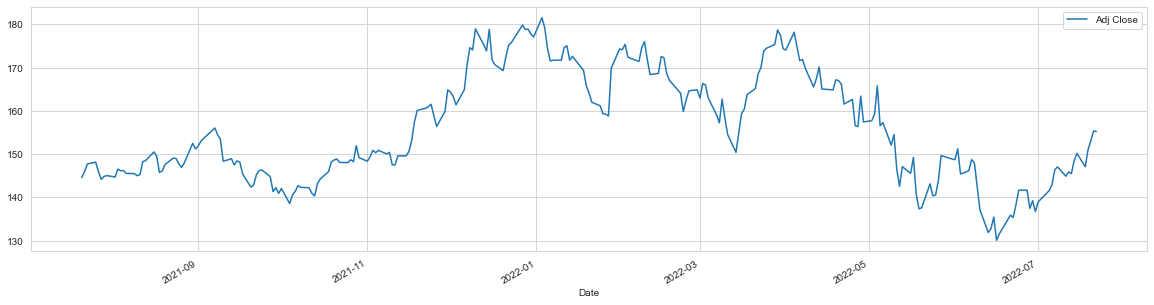

In [13]:
AAPL['Adj Close'].plot(legend=True,figsize=(20,5))

<AxesSubplot:xlabel='Date'>

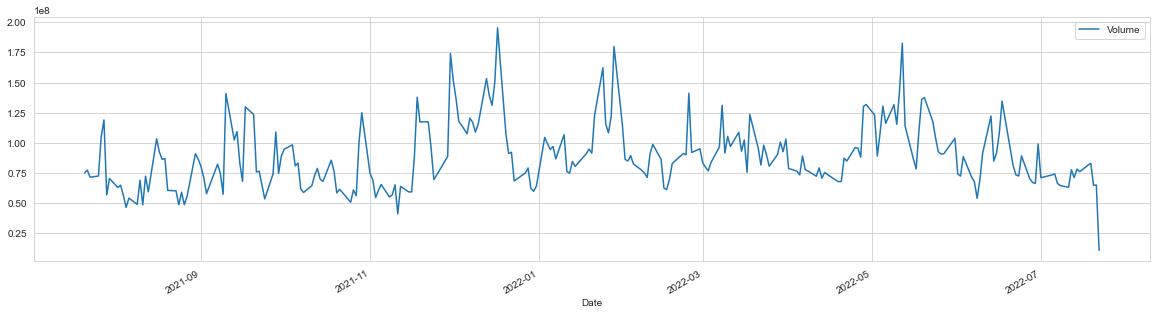

In [14]:
AAPL['Volume'].plot(legend=True,figsize=(20,5))

In [17]:
ma_day=[10,20,50]
for ma in ma_day:
    #column_name = "MA for %s day" %(str(ma))
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

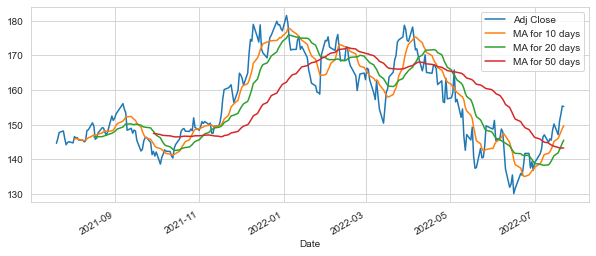

In [18]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

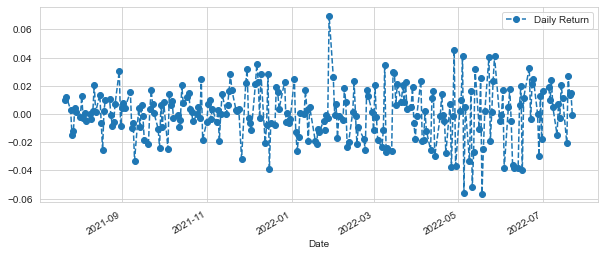

In [19]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(legend= True,figsize=(10,4),linestyle='--',marker='o')

C:\Users\vk602\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

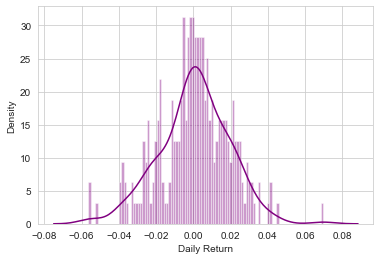

In [20]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

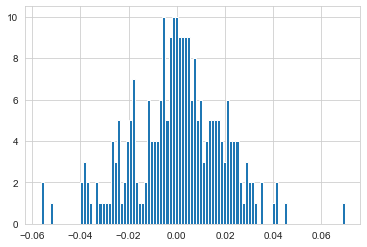

In [21]:
AAPL['Daily Return'].hist(bins=100)

In [22]:
closing_df=web.DataReader(tech_list,'yahoo',start,end)['Adj Close']


In [23]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-21,144.574020,132.600494,279.120789,179.259995
2021-07-22,145.966080,133.328506,283.822479,181.901505
2021-07-23,147.716064,137.815994,287.323853,182.832001
2021-07-26,148.143616,139.644501,286.708832,184.990997
2021-07-27,145.936234,136.796494,284.219208,181.319504


In [24]:
tech_rets=closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-21,NaN,NaN,NaN,NaN
2021-07-22,0.009629,0.005490,0.016845,0.014736
2021-07-23,0.011989,0.033657,0.012336,0.005115
2021-07-26,0.002894,0.013268,-0.002141,0.011809
2021-07-27,-0.014900,-0.020395,-0.008683,-0.019847


C:\Users\vk602\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


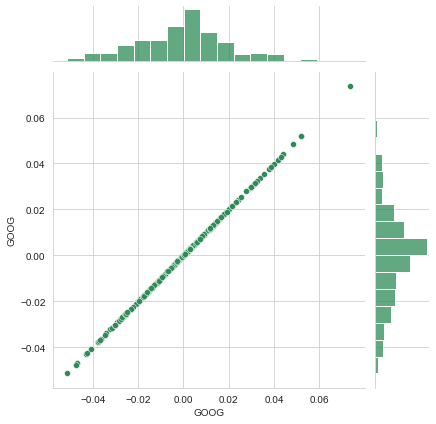

In [25]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

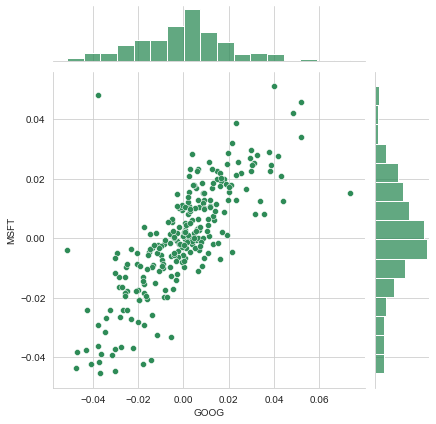

In [26]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',color='seagreen')

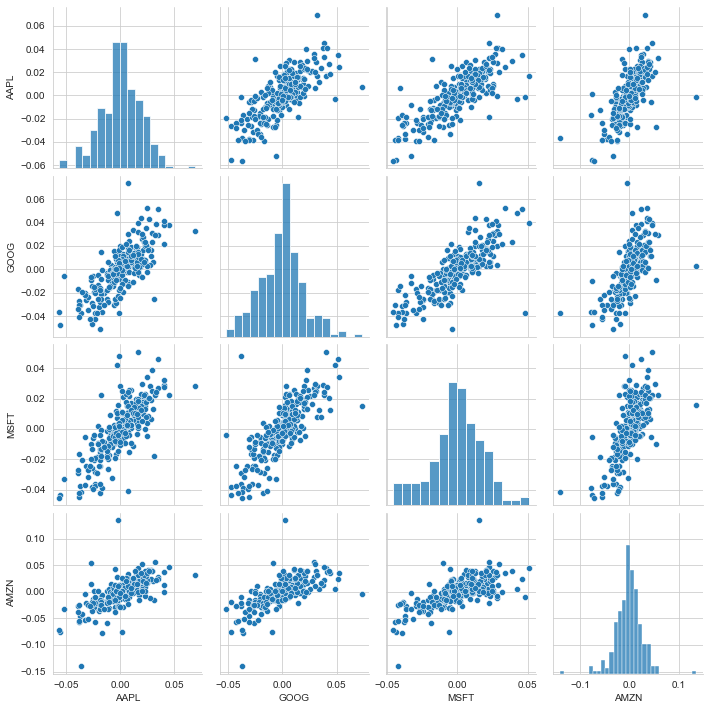

In [27]:
sns.pairplot(tech_rets.dropna())

<AxesSubplot:>

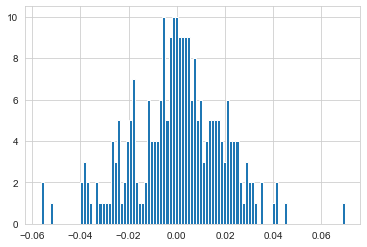

In [28]:
AAPL['Daily Return'].hist(bins=100)

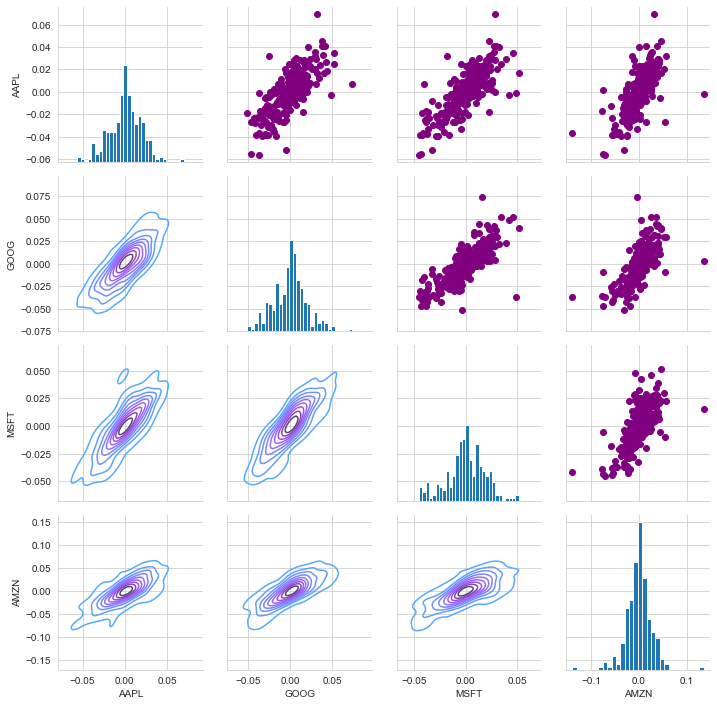

In [29]:
returns_fig= sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

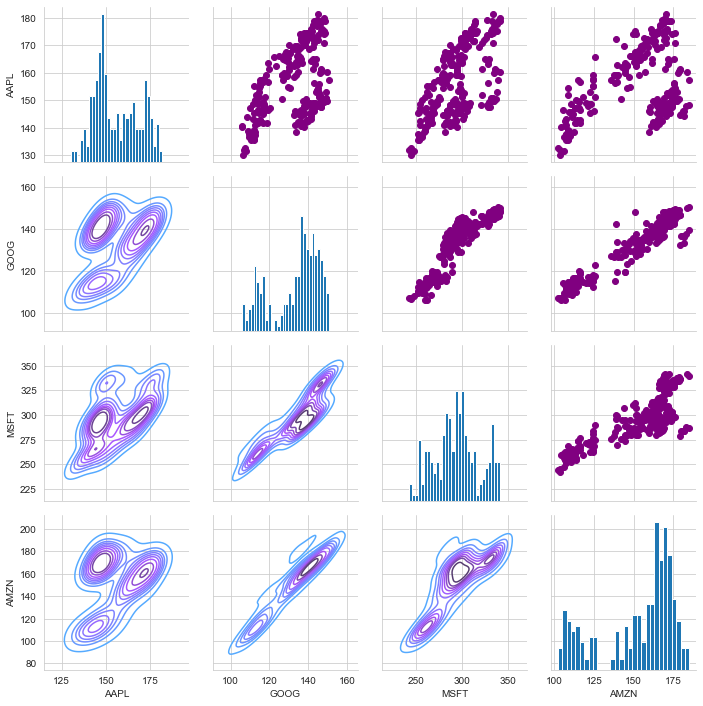

In [30]:
returns_fig= sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

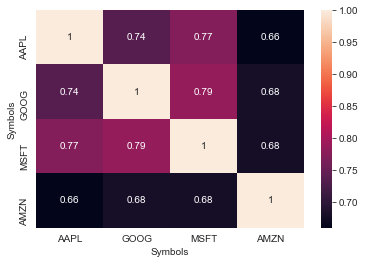

In [31]:
#from seaborn.linearmodels import corrplot,symmatplot
sns.heatmap((tech_rets.dropna()).corr(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

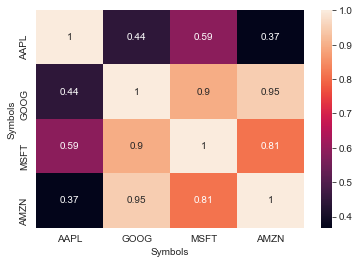

In [32]:
sns.heatmap(closing_df.corr(),annot=True)

In [33]:
rets = tech_rets.dropna()

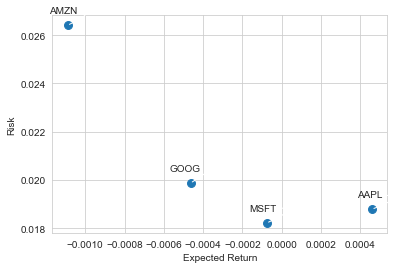

In [34]:
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

#Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-3'))

C:\Users\vk602\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

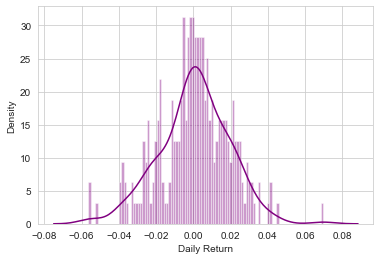

In [37]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [38]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-22,0.009629,0.005490,0.016845,0.014736
2021-07-23,0.011989,0.033657,0.012336,0.005115
2021-07-26,0.002894,0.013268,-0.002141,0.011809
2021-07-27,-0.014900,-0.020395,-0.008683,-0.019847
2021-07-28,-0.012196,-0.003034,-0.001117,0.001084


In [39]:
rets['AAPL'].quantile(0.05)

-0.03224778169290934

In [40]:
days = 365
dt= 1/days
mu = rets.mean()['GOOG']
sigma = rets['GOOG'].std()

In [41]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price= np.zeros(days)
    price[0]= start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale =sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
    return price   

In [42]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-21,132.617249,130.601501,130.787003,132.600494,14742000.0,132.600494
2021-07-22,133.504501,132.399994,132.649994,133.328506,13608000.0,133.328506
2021-07-23,138.808502,134.700500,135.259995,137.815994,26378000.0,137.815994
2021-07-26,139.712997,137.651001,138.250000,139.644501,23052000.0,139.644501
2021-07-27,140.011002,135.100006,140.011002,136.796494,42164000.0,136.796494


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

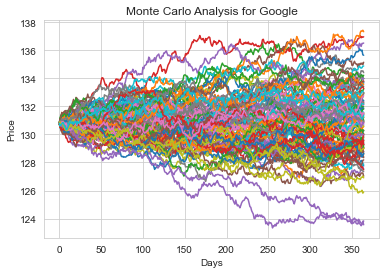

In [44]:
start_price= 130.787003
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')    

In [45]:
runs=10000
simulations= np.zeros(runs)
for run in range(runs):
    simulations[run]= stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final Price Distribution for Google stock after 365 days')

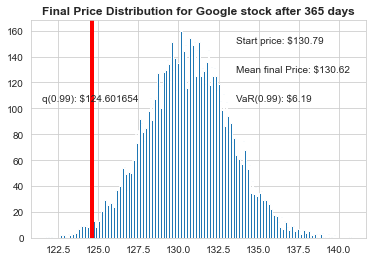

In [46]:
q= np.percentile(simulations,1)
plt.hist(simulations,bins=200)
#starting price
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

#mean ending price
plt.figtext(0.6,0.7,"Mean final Price: $%.2f" % simulations.mean())
# variation of the price(within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price -q,))
#Display 1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%2f" % q)
#plot a line at the 1% quantile result
plt.axvline(x=q, linewidth = 4,color = 'r')
#Title
plt.title(u"Final Price Distribution for Google stock after %s days" % days ,weight= 'bold')